# HW 2



### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/admissions.csv"
df_raw = pd.read_csv(url)
df_raw.head(5)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
len(df_raw)

400

Answer: 400 observations

#### Question 2. Create a summary table

In [4]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [5]:
df_raw.describe()

C:\Users\Allison\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GPA only goes up to 4.0, whereas GRE has a much greater range. With such a huge difference in ranges of the data, it's inevitable that the STD is going to be larger for the variable with the larger range.

#### Question 4. Drop data points with missing data


In [6]:
df2 = df_raw.dropna(inplace = False)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [7]:
len(df2)

397

In [8]:
df2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


The number of observations in the data has been reduced from 400 to 397, and the count of observations of each variable is now also 397. This tells me that there are no empty cells in this data set.


#### Question 6. Create box plots for GRE and GPA

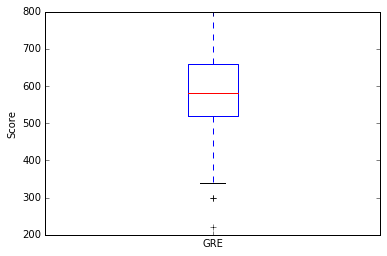

In [9]:
#boxplot 1 GRE
plt.boxplot([df2['gre']])

plt.xticks([1],['GRE'])
plt.ylabel('Score')

plt.show()

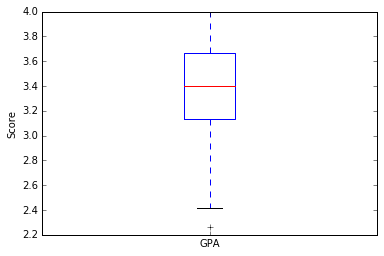

In [10]:
#boxplot 2 GPA
plt.boxplot([df2['gpa']])

plt.xticks([1],['GPA'])
plt.ylabel('Score')

plt.show()

#### Question 7. What do these plots show?

Answer: Both plots are fairly symmetrical with a few, low-scoring outliers (one outlier for GPA and two for GRE).

#### Question 8.  If our model had an assumption of a symmetric distribution would we meet that requirement? 

Answer: Yes

#### Question 9: Add dummy variables for GRE scores. Top 10% are considered very high. next 25% of GRE scores are considered high, next 50% are considered medium and lowest 25% are considered Low. 

In [16]:
df2['GRE_VHigh_Dummy'] = 0
df2['GRE_High_Dummy'] = 0
df2['GRE_Low_Dummy'] = 0

df2.loc[df2.gre >= df2.gre.quantile(0.9), 'GRE_VHigh_Dummy'] = 1
df2.loc[df2.gre >= df2.gre.quantile(0.75), 'GRE_High_Dummy'] = 1
df2.loc[df2.gre <= df2.gre.quantile(0.25), 'GRE_Low_Dummy'] = 1

df2.head()

C:\Users\Allison\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Allison\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Allison\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,admit,gre,gpa,prestige,GRE_VHigh_Dummy,GRE_High_Dummy,GRE_Low_Dummy
0,0,380.0,3.61,3.0,0,0,1
1,1,660.0,3.67,3.0,0,1,0
2,1,800.0,4.00,1.0,1,1,0
3,1,640.0,3.19,4.0,0,0,0
4,0,520.0,2.93,4.0,0,0,1


#### By a scatterplot explore the association between GRE based on GPA. For each observation, color according to perstige. 

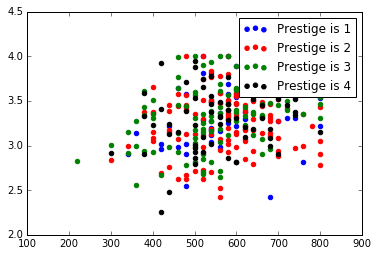

In [19]:
plt.scatter(df2.loc[(df2.prestige == 1), 'gre'], df2.loc[(df2.prestige == 1), 'gpa'], label = "Prestige is 1", color = 'b') 
plt.scatter(df2.loc[(df2.prestige == 2), 'gre'], df2.loc[(df2.prestige == 2), 'gpa'], label = "Prestige is 2", color = 'r')
plt.scatter(df2.loc[(df2.prestige == 3), 'gre'], df2.loc[(df2.prestige == 3), 'gpa'], label = "Prestige is 3", color = 'g')
plt.scatter(df2.loc[(df2.prestige == 4), 'gre'], df2.loc[(df2.prestige == 4), 'gpa'], label = "Prestige is 4", color = 'k')

plt.legend()
plt.show()